     ┌───┐┌───┐        ┌───┐┌───┐┌───┐        ┌───┐┌───┐┌─┐   
q_0: ┤ H ├┤ X ├─■──────┤ X ├┤ X ├┤ H ├─■──────┤ H ├┤ X ├┤M├───
     ├───┤├───┤ │P(-π) ├───┤├───┤├───┤ │P(-π) ├───┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ X ├─■──────┤ X ├┤ X ├┤ H ├─■──────┤ H ├┤ X ├─╫─┤M├
     └───┘└───┘        └───┘└───┘└───┘        └───┘└───┘ ║ └╥┘
c: 2/════════════════════════════════════════════════════╩══╩═
                                                         0  1 
The results of our simulated circuit are: 
{'11': 1000}


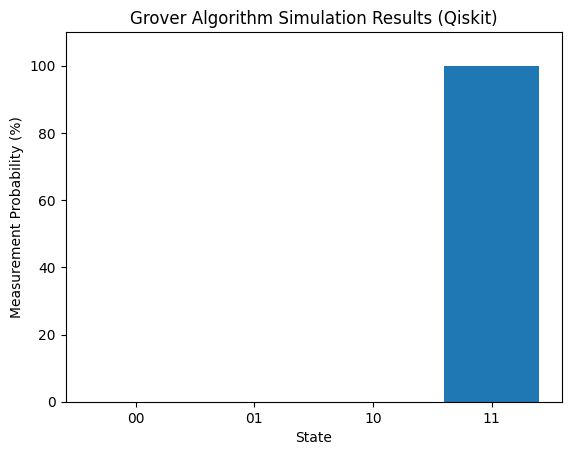

In [1]:
# The given Grover algorithm code focuses on identifying the state |11⟩. To achieve this, 
# an Oracle and an Amplification Operator are employed. In this scenario, the prescribed steps for the 
# quantum circuit are as follows: initialization, application of an Oracle targeting the state |11⟩, 
# and subsequent application of an Amplification Operator. 
# Measurements are then conducted, and the outcomes are simulated and presented visually through a histogram.

#----------------------------------------------------------------------------- 
# Step 1) To generate the Grover algorithm and find the state |11⟩ across five distinct frameworks, 
# our initial step involves importing the five essential quantum libraries: 
# Qiskit, Pyquil, Cirq, Pennylane, and Braket
#-----------------------------------------------------------------------------

from quantumgateway.quantum_circuit import QuantumCircuit, QuantumGate
from quantumgateway.quantum_translator.braket_translator import BraketTranslator
from quantumgateway.quantum_translator.cirq_translator import CirqTranslator
from quantumgateway.quantum_translator.qiskit_translator import QiskitTranslator
from quantumgateway.quantum_translator.pennylane_translator import PennyLaneTranslator
from quantumgateway.quantum_translator.pyquil_translator import PyQuilTranslator
from quantumgateway.main import translate_to_framework, simulate_circuit

import math

#---------------------------------------------------------------------------------------------------------   
# Step 2) Once this is done, we will create a circuit with two qubits and two classical bits, as follows:
#---------------------------------------------------------------------------------------------------------

circuit = QuantumCircuit(2, 2)  

#--------------------------------------------------------------------------------------------------------- 
# we have create a quantum register with 2 qubits and create a classical register with 2 bits, 
# and both register are included in the quantum circuit "QuantumCircuit". 

# Step 3) Once our registers are ready, we can start adding the specific gates to build our circuit.
#---------------------------------------------------------------------------------------------------------

# Hadamard gates are applied to each qubit in the circuit for initialization

for i in range(2):
    circuit.add_gate(QuantumGate("h", [i]))

#--------------------------------------------------------------------------------------------------------- 
# Step 4) Once our Hadamard are ready, we can start apply of an Oracle targeting the state |11⟩
#---------------------------------------------------------------------------------------------------------

# The function apply_oracle adds gates to the circuit to create an Oracle focusing on the state |11⟩.

def apply_oracle(circuit):
   
    circuit.add_gate(QuantumGate("x", [0]))  # Change qubit 0 to |1⟩
    circuit.add_gate(QuantumGate("x", [1]))  # Change qubit 1 to |0⟩
    circuit.add_gate(QuantumGate("cphase", [0, 1], [-math.pi]))  # Apply cphase with negative phase
    circuit.add_gate(QuantumGate("x", [0]))  # Restore qubit 0 to |0⟩
    circuit.add_gate(QuantumGate("x", [1]))  # Restore qubit 1 to |0⟩
#---------------------------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------------------------    
# **IMPORTANT: To find |00⟩ instead of |11⟩, we need to make changes to both the Oracle 
    # and Amplification Operator. **
   # For the oracle we have the following:

#def apply_oracle(circuit):
   
    #circuit.add_gate(QuantumGate("cphase", [0, 1], [-math.pi]))  # Apply cphase with negative phase
# go to the second step in the Amplification operator
#---------------------------------------------------------------------------------------------------------
    
# **IMPORTANT: To modify the Grover algorithm to find the state |10⟩ instead of |11⟩**
# ** We need to adjust the Oracle part of the circuit. Specifically, 
     
#def apply_oracle(circuit):
    #circuit.add_gate(QuantumGate("x", [1]))  # Change qubit 1 to |0⟩
    #circuit.add_gate(QuantumGate("cphase", [0, 1], [-math.pi]))  
    #circuit.add_gate(QuantumGate("x", [1]))  # Restore qubit 1 to |0⟩

# *Now if we are interested in modifying the Grover algorithm to find the state |01⟩ instead of |10⟩ starting from code to find |11⟩ we require**
# ** a minor correction. In this case, we need to adjust the Oracle part of the circuit as follows:
#def apply_oracle(circuit):
    #circuit.add_gate(QuantumGate("x", [0]))  
    #circuit.add_gate(QuantumGate("cphase", [0, 1], [-math.pi]))  
    #circuit.add_gate(QuantumGate("x", [0]))  

#In this modification, we change the application of the X gate to qubit 0 instead of qubit 1. 
# This will set qubit 0 to |1⟩ and apply the controlled-phase gate with a negative phase, 
#targeting the state |01⟩. Finally, the X gate is applied again to restore qubit 0 to |0⟩.
#---------------------------------------------------------------------------------------------------------
    

#--------------------------------------------------------------------------------------------------------- 
# Step 5) Introduction and application of the Amplification Operator
#---------------------------------------------------------------------------------------------------------

# Function to add the Amplification Operator
def apply_amplification(circuit):
     # Apply Hadamard and X gates
    for i in range(2):
        circuit.add_gate(QuantumGate("x", [i]))  # Apply X gates before Hadamard
        circuit.add_gate(QuantumGate("h", [i]))

    # Sequence of gates for the Amplification Operator
    pi = math.pi
    circuit.add_gate(QuantumGate("cphase", [0, 1], [-pi]))  # Adjust the phase of the cphase
#---------------------------------------------------------------------------------------------------------    
# ***The second step to find |00⟩ instead of |11⟩, we modify**
    
    #circuit.add_gate(QuantumGate("cphase", [0, 1], [pi]))
    
# This mean the sign of  phase must be pi
#---------------------------------------------------------------------------------------------------------
    
    # Apply Hadamard and X gates again
    for i in range(2):
        circuit.add_gate(QuantumGate("h", [i]))
        circuit.add_gate(QuantumGate("x", [i]))

# The function apply_amplification adds gates to the circuit for an amplification operation.
# It involves applying Hadamard and X gates, a controlled-phase gate (cphase), a controlled-not gate (cnot), 
# and then applying Hadamard and X gates again.

#--------------------------------------------------------------------------------------------------------- 
# Step 6) Applying Oracle and Amplification Operator
#---------------------------------------------------------------------------------------------------------

# The previously defined functions apply_oracle and apply_amplification are called to apply 
# the Oracle and the Amplification Operator to the circuit   
apply_oracle(circuit)
apply_amplification(circuit)

#--------------------------------------------------------------------------------------------------------- 
# Step 7) Measurement of Qubits
#---------------------------------------------------------------------------------------------------------

for i in range(2):
    circuit.add_gate(QuantumGate("measure", [i, i]))

# Measurement gates are added to measure the state of each qubit.

#--------------------------------------------------------------------------------------------------------- 
# Step 8) Simulating the Circuit and Printing the Result
#---------------------------------------------------------------------------------------------------------

selected_framework = 'qiskit'  # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
translated_circuit.print_circuit()

print("The results of our simulated circuit are: ")
counts = simulate_circuit(circuit, selected_framework)
print(counts)


from qiskit.visualization import plot_histogram  
import matplotlib.pyplot as plt

# Visualize results in a histogram
states = ['00', '01', '10', '11'] # we define a list of states that we want to include in the histogram, which are '00', '01', '10', and '11'. 
counts_keys = list(counts.keys()) # counts_keys is a list of keys obtained from the simulation results

# Create a dictionary to store counts for each state, including 0 counts for missing states
result_counts = {state: counts[state] if state in counts_keys else 0 for state in states}

# the result_counts includes counts for each state from the simulation results (counts) if 
# the state is present, and assigns 0 counts for states that are missing. 
# This ensures that all specified states have entries in the result_counts.

# Calculate total counts to normalize to percentages
total_counts = sum(result_counts.values())

# We calculate the total counts by summing up the counts for all states in the result_counts.
# This total count will be used to normalize the counts to percentages.

# Normalize counts to percentages
percentages = {state: (count / total_counts) * 100 for state, count in result_counts.items()}

# This line creates a new dictionary called percentages. It contains the percentage of 
# occurrences for each state by dividing the count for that state by the total counts and multiplying by 100.

plt.bar(percentages.keys(), percentages.values()) # We plt.bar() from matplotlib.pyplot to create a bar chart
plt.xlabel('State')
plt.ylabel('Measurement Probability (%)')
plt.title('Grover Algorithm Simulation Results (Qiskit)')
plt.ylim(0, 110)  # Set y-axis limits from 0 to 100
plt.show() # plt.show() is called to display the histogram

0: ───H───X───@───X───X───H───@───H───X───M('result0')───
              │               │
1: ───H───X───@───X───X───H───@───H───X───M('result1')───
The results of our simulated circuit are: 
{'11': 1000}


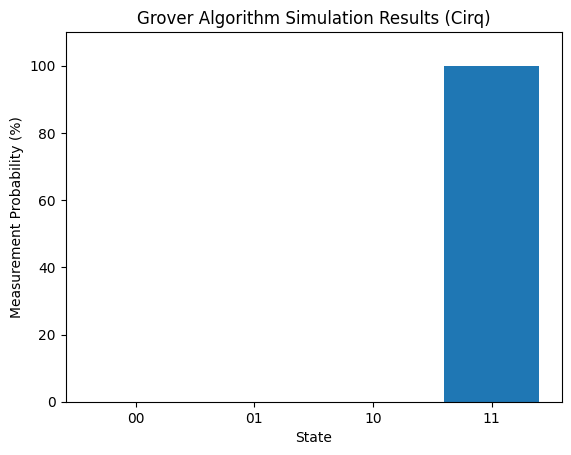

In [2]:
# If we wish to obtain the result from any of the following quantum frameworks instead of qiskit: cirq, pennylane, pyquil, amazonbraket,
# let's choose Google's Cirq. In this case, the quantum circuit is given by
selected_framework = 'cirq' # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
translated_circuit.print_circuit()

# and the visualization of the results are 

print("The results of our simulated circuit are: ")
counts = simulate_circuit(circuit, selected_framework)
print(counts)

import matplotlib.pyplot as plt

states = ['00', '01', '10', '11']  
counts_keys = list(counts.keys()) 
result_counts = {state: counts[state] if state in counts_keys else 0 for state in states}
total_counts = sum(result_counts.values())
percentages = {state: (count / total_counts) * 100 for state, count in result_counts.items()}
plt.bar(percentages.keys(), percentages.values()) 
plt.xlabel('State')
plt.ylabel('Measurement Probability (%)')
plt.title('Grover Algorithm Simulation Results (Cirq)')
plt.ylim(0, 110)  
plt.show() 

DECLARE ro BIT[2]
H 0
H 1
X 0
X 1
CPHASE(-pi) 0 1
X 0
X 1
X 0
H 0
X 1
H 1
CPHASE(-pi) 0 1
H 0
X 0
H 1
X 1
MEASURE 0 ro[0]
MEASURE 1 ro[1]

The results of our simulated circuit are: 
{'11': 1000}


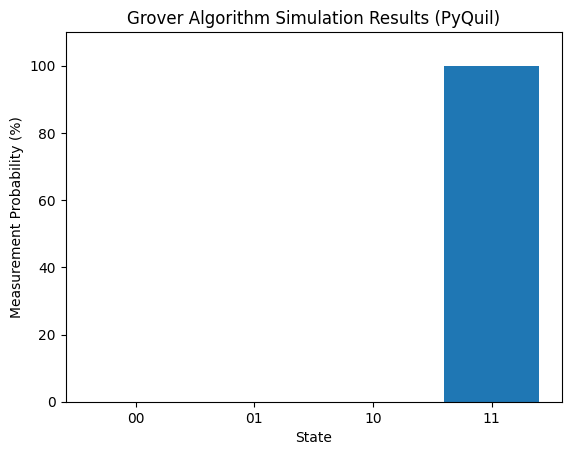

In [3]:
# we can proceed to see how the quantum circuit looks like in Rigetti's PyQuil 
selected_framework = 'pyquil' # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
translated_circuit.print_circuit()

# and the visualization of the results are 
print("The results of our simulated circuit are: ")
print(counts)

import matplotlib.pyplot as plt

states = ['00', '01', '10', '11']  
counts_keys = list(counts.keys()) 
result_counts = {state: counts[state] if state in counts_keys else 0 for state in states}
total_counts = sum(result_counts.values())
percentages = {state: (count / total_counts) * 100 for state, count in result_counts.items()}
plt.bar(percentages.keys(), percentages.values()) 
plt.xlabel('State')
plt.ylabel('Measurement Probability (%)')
plt.title('Grover Algorithm Simulation Results (PyQuil)')
plt.ylim(0, 110)  
plt.show() 

0: ──H──X─╭●─────────────────────X──X──H─╭●─────────────────────H──X─┤  Sample[Z]
1: ──H──X─╰Rot(-3.14,0.00,0.00)──X──X──H─╰Rot(-3.14,0.00,0.00)──H──X─┤  Sample[Z]
The results of our simulated circuit are: 
{'11': 1000}


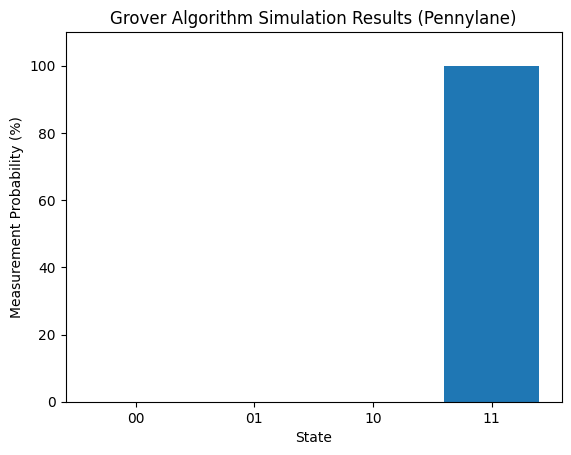

In [4]:
# we can proceed to see how the quantum circuit looks like in Xanadu's PennyLane
selected_framework = 'pennylane' # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
translated_circuit.print_circuit()

# and the visualization of the results are 
print("The results of our simulated circuit are: ")
print(counts)

import matplotlib.pyplot as plt

states = ['00', '01', '10', '11']  
counts_keys = list(counts.keys()) 
result_counts = {state: counts[state] if state in counts_keys else 0 for state in states}
total_counts = sum(result_counts.values())
percentages = {state: (count / total_counts) * 100 for state, count in result_counts.items()}
plt.bar(percentages.keys(), percentages.values()) 
plt.xlabel('State')
plt.ylabel('Measurement Probability (%)')
plt.title('Grover Algorithm Simulation Results (Pennylane)')
plt.ylim(0, 110)  
plt.show() 

T  : |0|1|     2      |3|4|5|     6      |7|8|
                                              
q0 : -H-X-C------------X-X-H-C------------H-X-
          |                  |                
q1 : -H-X-PHASE(-3.14)-X-X-H-PHASE(-3.14)-H-X-

T  : |0|1|     2      |3|4|5|     6      |7|8|
The results of our simulated circuit are: 
{'11': 1000}


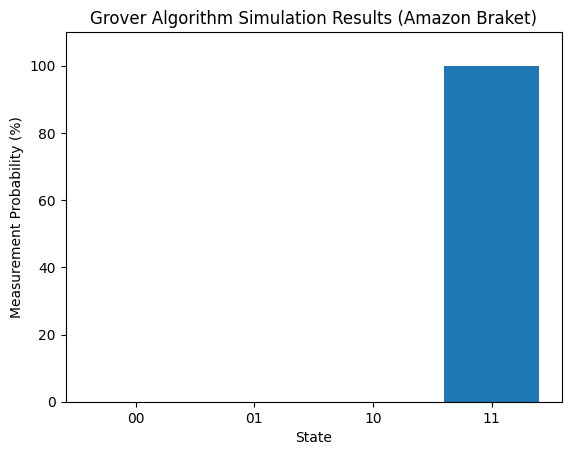

In [5]:
# and finaly Amazon's Braket
selected_framework = 'amazonbraket' # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
translated_circuit.print_circuit()

# and the visualization of the results are 
print("The results of our simulated circuit are: ")
print(counts)

import matplotlib.pyplot as plt

states = ['00', '01', '10', '11']  
counts_keys = list(counts.keys()) 
result_counts = {state: counts[state] if state in counts_keys else 0 for state in states}
total_counts = sum(result_counts.values())
percentages = {state: (count / total_counts) * 100 for state, count in result_counts.items()}
plt.bar(percentages.keys(), percentages.values()) 
plt.xlabel('State')
plt.ylabel('Measurement Probability (%)')
plt.title('Grover Algorithm Simulation Results (Amazon Braket)')
plt.ylim(0, 110)  
plt.show()

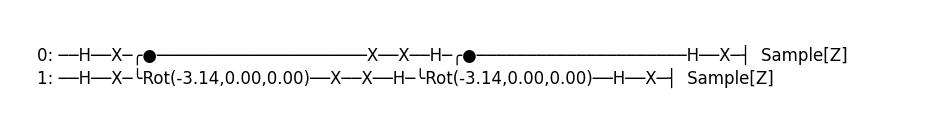

In [30]:
# The following is to save the circuit of each platform in an image

from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
import io
import sys

# Redirect the standard output to a string buffer
stdout = sys.stdout
sys.stdout = io.StringIO()

selected_framework = 'pennylane' # Change this to the desired framework
translated_circuit = translate_to_framework(circuit, selected_framework)
translated_circuit.print_circuit()

# and the visualization of the results are 
#print("The results of our simulated circuit are: ")
#print(counts)

printed_circuit = sys.stdout.getvalue()

# Restore the standard output
sys.stdout = stdout
# Define the bbox
bbox = {'width': 100, 'height': 100}

# Save the printed circuit as an image with its exact size
plt.figure(figsize=(bbox['width'] / 8.5, bbox['height'] / 200), dpi=100)  # Convert from points to inches
plt.text(0.03, 0.1, printed_circuit, ha='left', va='top', wrap=True, fontsize=12)
plt.axis('off')
plt.savefig("Grover_algoritm_2_qubits.png", bbox_inches='tight', pad_inches=0, dpi=100)

# Show the image
plt.show()

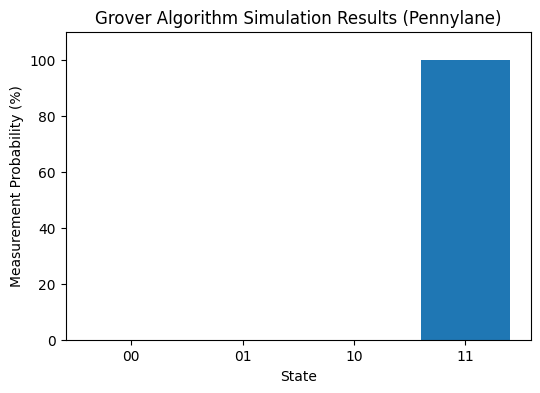

In [31]:
# and the following code is to save the image from the histogram

states = ['00', '01', '10', '11']  
counts_keys = list(counts.keys()) 
result_counts = {state: counts[state] if state in counts_keys else 0 for state in states}
total_counts = sum(result_counts.values())
percentages = {state: (count / total_counts) * 100 for state, count in result_counts.items()}

# Create the bar plot
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
plt.bar(percentages.keys(), percentages.values()) 
plt.xlabel('State')
plt.ylabel('Measurement Probability (%)')
plt.title('Grover Algorithm Simulation Results (Pennylane)')
plt.ylim(0, 110)  
plt.savefig("measurement_probabilities.png", bbox_inches='tight', pad_inches=0.1)
plt.show() 